<a href="https://colab.research.google.com/github/mingyu-yuan/twitter-text-analysis/blob/main/twitter_text_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Exploratory data analysis

In the first part, we will perform basic exploratory data analysis to learn more about the tweet data. We will demonstrate possible preprocessing steps that people often undertake, but these are not meant to be exhaustive. There is more to learn, for instance, cleaning URLs, digits, etc., to normalize the data and get it ready for the downstream task. The code demonstrated in this notebook was learned from the class materials of DATA200, taught in Fall 22 at UC Berkeley.

To run through the notebook succesfully, I recommend running it Colab, which has most of the required packages installed.

### 1. Load packages

In [4]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=8deacd476d045020a3e3fd02ec1c9ffc02b0b493f01fd7c085c186cfe47eeb3f
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [5]:
import logging
import wget
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Download dataset

In [11]:
print('Downloading dataset...')

# The URL for the dataset zip file
# Update 24/06: the following link does not work but the data is available on Kaggle and other sources
url = 'http://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip'

# Download the file
wget.download(url)

# Unzip the dataset
!unzip trainingandtestdata.zip

Archive:  archive.zip
  inflating: training.1600000.processed.noemoticon.csv  


### 3. Examine the data

In [12]:
# load the data into dataframe
df = pd.read_csv("./training.1600000.processed.noemoticon.csv",
     names=['label', 'twitter_id', 'time', 'query', 'account', 'tweet'],
     encoding='latin-1')

# print the number of tweets
print('Number of tweets: {:,}\n'.format(df.shape[0]))

# sample 10 records from the data
df.sample(10)

Number of tweets: 1,600,000



,label,twitter_id,time,query,account,tweet
1130809,4,1975756266,Sat May 30 15:50:07 PDT 2009,NO_QUERY,rawkalways,@pursuingyaweh nice to meet u irl.
1047382,4,1957762143,Fri May 29 01:31:47 PDT 2009,NO_QUERY,Zmiley,wey party tonight after work.. gonna be lots ...
339702,0,2014694746,Wed Jun 03 02:22:43 PDT 2009,NO_QUERY,LoraleiHaylock,Ack can't bend knee without incurring torturou...
350528,0,2017881828,Wed Jun 03 09:05:46 PDT 2009,NO_QUERY,_marylaine,headachey
1522229,4,2176420791,Mon Jun 15 03:49:44 PDT 2009,NO_QUERY,spiller2,@ALOliver all thanks to twitter!!!
480265,0,2179177508,Mon Jun 15 08:45:06 PDT 2009,NO_QUERY,amysav83,@garry1bowie that's me now.. on a backshift 2m...
132047,0,1835663920,Mon May 18 06:29:32 PDT 2009,NO_QUERY,Trigoddess1969,walked in boot w/Bella &amp; boys Sun 3 mi 45 ...
1325616,4,2015153297,Wed Jun 03 03:51:49 PDT 2009,NO_QUERY,hardmandn,@lilyroseallen I dont know if she is on twitte...
1395749,4,2053759277,Sat Jun 06 05:36:51 PDT 2009,NO_QUERY,craff2008,@helenotway i have a touch not phone and the...
609793,0,2223874574,Thu Jun 18 08:49:05 PDT 2009,NO_QUERY,gamblin_aria,@smurphy0806 Aw that sucks.


In [13]:
# number of unique id
print(df['twitter_id'].nunique())

# number of unique account
print(df['account'].nunique())

1598315
659775


In [14]:
# split the date column into week, month, day, time, timezone, year
df[['week','month','day','time','timezone','year']] = df['time'].str.split(" ", expand=True)

# check if time is normalized (if the timezone is the same)
df['timezone'].nunique()

1

In [15]:
df

,label,twitter_id,time,query,account,tweet,week,month,day,timezone,year
0,0,1467810369,22:19:45,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Mon,Apr,06,PDT,2009
1,0,1467810672,22:19:49,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,Mon,Apr,06,PDT,2009
2,0,1467810917,22:19:53,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,Mon,Apr,06,PDT,2009
3,0,1467811184,22:19:57,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,Mon,Apr,06,PDT,2009
4,0,1467811193,22:19:57,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",Mon,Apr,06,PDT,2009
...,...,...,...,...,...,...,...,...,...,...,...
1599995,4,2193601966,08:40:49,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,Tue,Jun,16,PDT,2009
1599996,4,2193601969,08:40:49,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,Tue,Jun,16,PDT,2009
1599997,4,2193601991,08:40:49,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,Tue,Jun,16,PDT,2009
1599998,4,2193602064,08:40:49,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,Tue,Jun,16,PDT,2009


### 4. Extract mentions

In [16]:
# a useful regex pattern to match mentions
mentions_re = r"(?<=@)\w+"

# print the first tweet
print(df["tweet"].iloc[0])
"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"

# print the mention in the first tweet
print(re.findall(mentions_re, df["tweet"].iloc[0]))

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D
['switchfoot']


In [17]:
# a useful function to extract all of the mentions from each tweet
def extract_mentions(full_texts):
   mentions = pd.DataFrame(full_texts.str.lower().str.findall(mentions_re).explode().dropna())
   mentions.columns = ["mentions"]
   mentions = mentions.merge(df['label'], left_index=True, right_index=True, how='left')
   return mentions

# apply the function to the tweet column
mentions = extract_mentions(df['tweet'])
mentions['mentions'].value_counts()[:5]

mentions
mileycyrus       4580
tommcfly         3904
ddlovato         3474
jonasbrothers    2384
davidarchie      1386
Name: count, dtype: int64

### 5. Visualize proportions of negative tweets

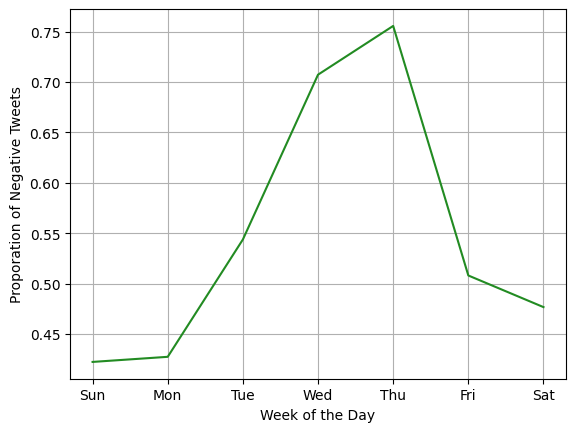

In [18]:
# pivot the table
by_week = pd.pivot_table(df, values='year', index=['label'], columns=['week'], aggfunc='count')
cols = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
by_week[cols] = by_week[cols] / by_week[cols].sum()
by_week = by_week.transpose().reindex(cols)
by_week.index.name = None
by_week.columns.name = None

# plot the proportion of tweets with negative polarity across the whole week
sns.lineplot(data=by_week, x=by_week.index, y=0, color='forestgreen')
plt.xlabel("Week of the Day")
plt.ylabel("Proporation of Negative Tweets")
plt.grid()
plt.show();

In [20]:
# df.to_pickle('tweet_sent.pkl')

# Part 2: Sentiment Analysis with BERT

In this part, we will use BERT to tokenize tweet data and proceed to perform sentiment classification. Given the massive data size, we sample a small portion from the tweet dataframe. The classification pipeline demonstrated below comes from [this Kaggle tutorial](https://www.kaggle.com/code/prakharrathi25/sentiment-analysis-using-bert).

### 1. Load packages

In [22]:
# install transformers and pytorch if necessary
!pip install transformers
!pip install torch

In [23]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 2. Tokenization

In [24]:
# initialize a tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [25]:
# sample 1% of tweets from the dataframe
df_model = pd.concat([df.loc[df['label'] == 0].sample(frac=0.01),
                      df.loc[df['label'] == 4].sample(frac=0.01)])

# replace the label for positive tweets with 1
df_model.loc[df_model["label"] == 4, "label"] = 1

In [26]:
# store length of each tweet
token_lens = []

# iterate through the tweet column
for txt in df_model.tweet:
   tokens = tokenizer.encode(txt)
   token_lens.append(len(tokens))

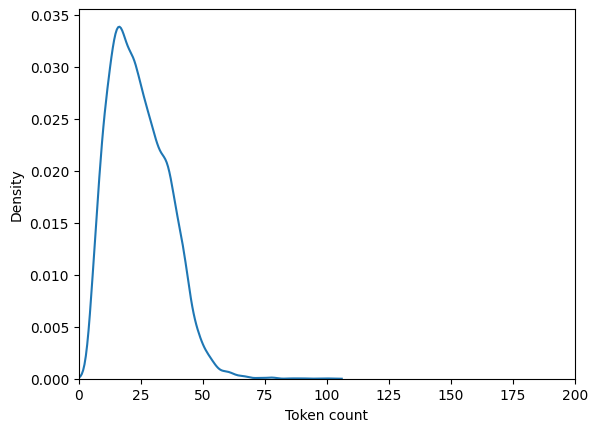

In [28]:
# plot the distribution of tweet lengths
sns.kdeplot(token_lens)
plt.xlim([0, 200])
plt.xlabel('Token count');

### 3. Build the classifier

Codes in this section come from [this Kaggle tutorial](https://www.kaggle.com/code/prakharrathi25/sentiment-analysis-using-bert) on sentiment classification. Check the tutorial out for details!

In [29]:
df_train, df_test = train_test_split(df_model, test_size=0.1, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [30]:
class TweetDataset(Dataset):

  def __init__(self, tweets, targets, tokenizer, max_len):
    self.tweets = tweets
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.tweets)

  def __getitem__(self, item):
    review = str(self.tweets[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      tweet,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      padding='max_length',
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'review_text': tweet,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [33]:
def create_data_loader(df, tokenizer, max_len, batch_size):

  ds = TweetDataset(
    tweets=df.tweet.to_numpy(),
    targets=df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=2
  )

In [34]:
MAX_LEN = 125
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [35]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [36]:
# load BERT
bert_model = BertModel.from_pretrained('bert-base-cased', return_dict=False)

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [37]:
# create the classifier
class SentimentClassifier(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.bert = BertModel.from_pretrained('bert-base-cased', return_dict=False)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [38]:
# instantiate the model and move to classifier
model = SentimentClassifier(2)
model = model.to(device)

In [39]:
# check the dimention of input
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

In [40]:
# check the hidden layer size
print(bert_model.config.hidden_size)

768


In [41]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.3884, 0.6116],
        [0.6384, 0.3616],
        [0.7121, 0.2879],
        [0.5262, 0.4738],
        [0.4479, 0.5521],
        [0.6764, 0.3236],
        [0.4624, 0.5376],
        [0.5253, 0.4747],
        [0.6331, 0.3669],
        [0.5900, 0.4100],
        [0.5267, 0.4733],
        [0.4911, 0.5089],
        [0.4524, 0.5476],
        [0.4472, 0.5528],
        [0.6088, 0.3912],
        [0.6250, 0.3750]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

### 4. Start training

In [44]:
EPOCHS = 8

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [45]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0

  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [46]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [47]:
%%time

history = defaultdict(list)
best_accuracy = 0

for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/8
----------
Train loss 0.4767809912893507 accuracy 0.7746527777777777
Val   loss 0.45819987177848814 accuracy 0.7975

Epoch 2/8
----------
Train loss 0.2754358840102537 accuracy 0.8942361111111111
Val   loss 0.5625408069044352 accuracy 0.80875

Epoch 3/8
----------
Train loss 0.16177309142749033 accuracy 0.9534027777777778
Val   loss 0.8911095495894551 accuracy 0.805

Epoch 4/8
----------
Train loss 0.10022102072498658 accuracy 0.9772222222222222
Val   loss 1.021355867208913 accuracy 0.8125

Epoch 5/8
----------
Train loss 0.06723366529305673 accuracy 0.9849305555555555
Val   loss 1.0917228184919805 accuracy 0.81875

Epoch 6/8
----------
Train loss 0.040589812691000086 accuracy 0.9909722222222223
Val   loss 1.23440612858627 accuracy 0.81875

Epoch 7/8
----------
Train loss 0.030321274642742032 accuracy 0.9936111111111111
Val   loss 1.3809390431758948 accuracy 0.81125

Epoch 8/8
----------
Train loss 0.020467232554995766 accuracy 0.9955555555555555
Val   loss 1.447314406709629 

### 5. Visualize accuracy

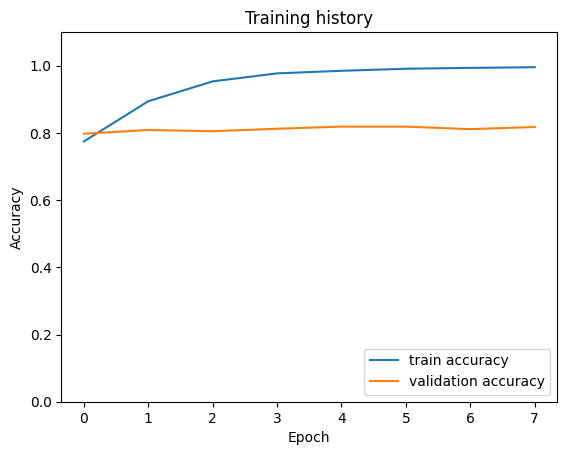

In [52]:
plt.plot([i.cpu().numpy() for i in history['train_acc']], label='train accuracy')
plt.plot([i.cpu().numpy() for i in history['val_acc']], label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=4)
plt.ylim([0, 1.1]);

### References
[1] [Sentiment Analysis using BERT](https://www.kaggle.com/code/prakharrathi25/sentiment-analysis-using-bert)